In [33]:
import pandas as pd
import numpy as np
from datetime import datetime


In [34]:
df = pd.read_csv('Alcohol_Sales.csv')

In [35]:
df = df.set_index('date')
df.head()

,sales
date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<AxesSubplot:xlabel='date'>

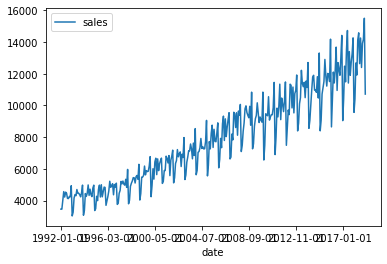

In [36]:
df.plot()

In [41]:
df.loc['1992-01-01']

sales    3459
Name: 1992-01-01, dtype: int64